## Overviw 
1. Create bar charts for qualitative variables, for example, the amount (number) of eggs consumed in a meal (categories: {breakfast, lunch, or dinner}). In general, bar chart maps categories to numbers.
2. Create Pie charts. A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. A pie chart is preferably used when the number of categories is less, and you'd like to see the proportion of each category.
3. Create histograms for quantitative variables. A histogram splits the (tabular) data into evenly sized intervals and displays the count of rows in each interval with bars. A histogram is similar to a bar chart, except that the "category" here is a range of values.
4. Analyze the bar charts and histograms.


## Tidy Dataset
In short, a tidy dataset(opens in a new tab) is a tabular dataset where:

1. each variable is a column
2. each observation is a row
3. each type of observational unit is a table

- Each variable in a tidy dataset must have its own column
- Each observation in a tidy dataset must have its own row
- Each observational unit in a tidy dataset must have its own table
- Only the second rule of tidy data is satisfied in this non-tidy representation of the above data: each observation forms a row

https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

## Bar Charts
A bar chart depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.
- For **nominal data**, the bars can be ordered by frequency to easily see which category is the most common.
- **Ordinal data** should not be re-ordered because the inherent ordering of the levels is typically more important to display.
![screen-shot-2021-05-14-at-3 13 12-pm](https://github.com/user-attachments/assets/ad2226bd-0b06-4c42-b373-886d7b6d4e47)

### Bar Chart using Seaborn

#### Create a vertical bar chart using Seaborn, with default colors

In [1]:
# Necessary imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the csv file, and check its top 10 rows
df = pd.read_csv('Data/diamonds.csv')
print(df.shape)
df.head(10)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


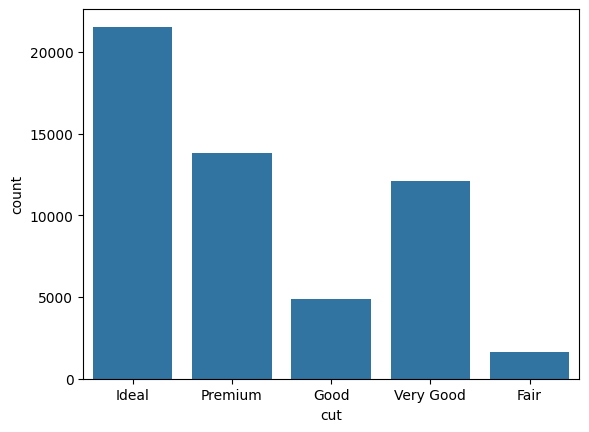

In [3]:
# A semicolon (;) at the end of the statement will suppress printing the plotting information
sns.countplot(data=df, x='cut');

#### Create a vertical bar chart using Seaborn, with a uniform single color

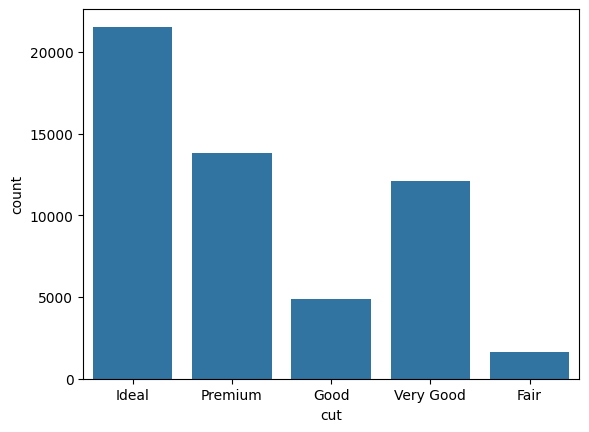

In [4]:
# plots using Tableau blue
sns.countplot(data=df, x='cut', color='tab:blue');

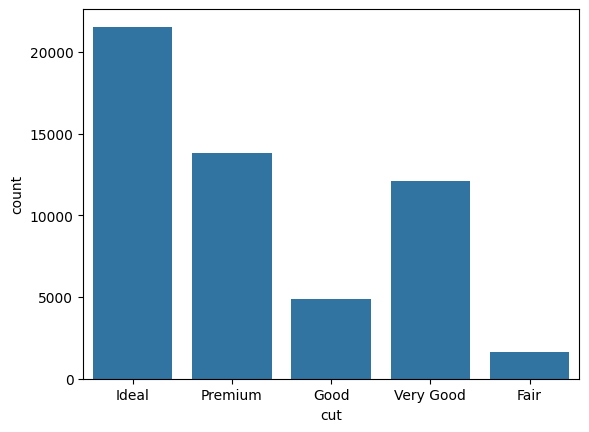

In [5]:
# Alternately, the `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

# Use the color palette directly
sns.countplot(data=df, x='cut', color=base_color);

### Bar Chart using the Matplotlib

#### Create a vertical bar chart using Matplotlib, with a uniform single color

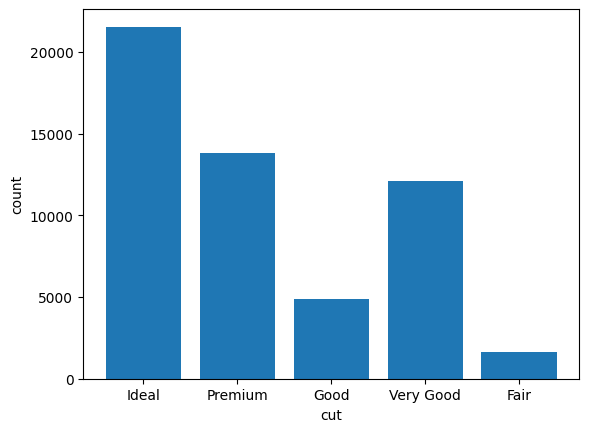

In [6]:
# Return the Series having unique values
x = df['cut'].unique()

# Return the Series having frequency count of each unique value
y = df['cut'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('cut')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

#### Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()

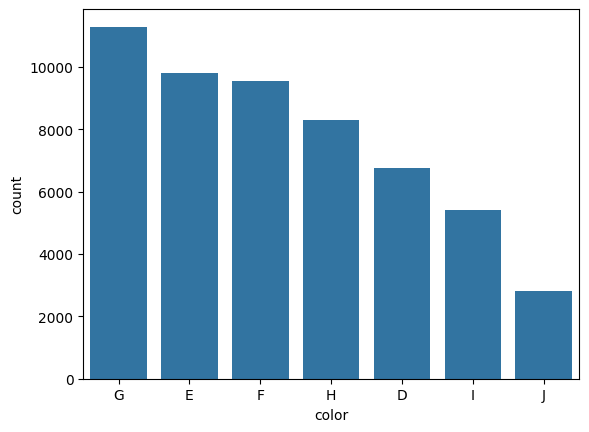

In [7]:
# Static-ordering the bars
sns.countplot(data=df, x='color', color='tab:blue', order=['G', 'E', 'F', 'H', 'D', 'I', 'J']);

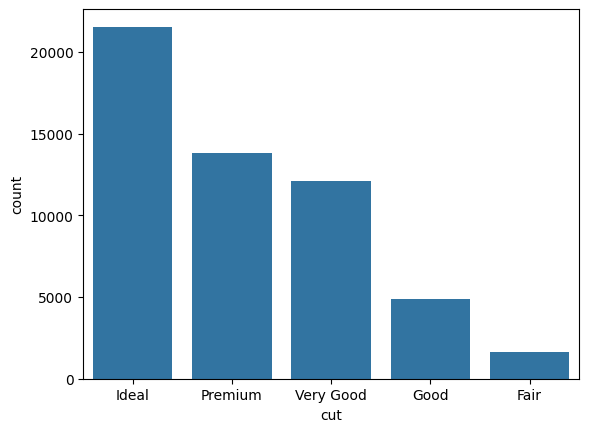

In [8]:
# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'color' column, and sort it in descending order
# Returns a Series
freq = df['cut'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=df, x='cut', color='tab:blue', order=gen_order);

#### Rotate the category labels (not axes)

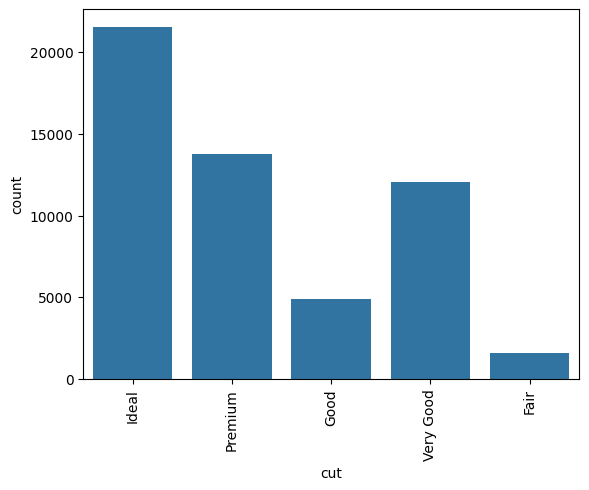

In [9]:
# Plot the cut grade on a vertical bar chart
sns.countplot(data=df, x='cut', color='tab:blue');

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

#### Rotate the axes clockwise

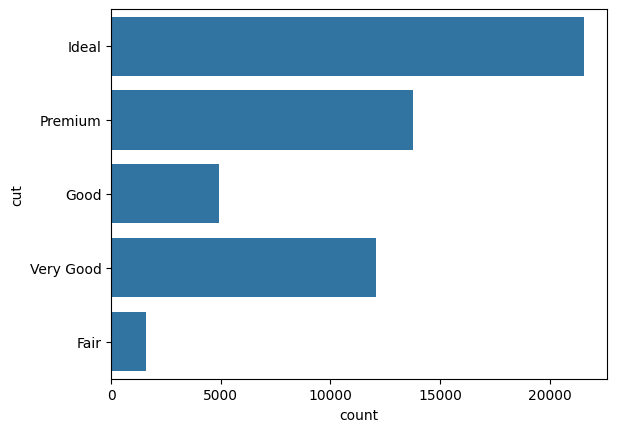

In [10]:
sns.countplot(data=df, y='cut', color='tab:blue');

## Absolute vs. Relative Frequency
In the previous concept, all bar charts were encoded with absolute frequency, which is the total number of data points for each category. While this can be helpful, there are times when you want to look at the frequency of a category as it relates to the total number of data points, this is relative frequency.

Changing the count axis to reflect relative proportions makes it easier to see how much each category contributes to the whole.

#### Plot the horizontal absolute bar charts

In [11]:
## Count the frequency of unique values in the `clarity` column. 
## By default, returns the decreasing order of the frequency.
clarity_counts = df['clarity'].value_counts()
clarity_counts

## Get the unique values of the `clarity` column, in the decreasing order of the frequency.
order = clarity_counts.index

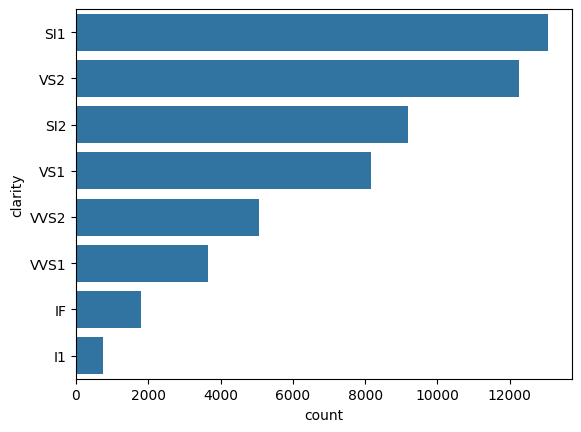

In [12]:
sns.countplot(data=df, y='clarity', color='tab:blue', order=order);

#### Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

In [15]:
## Uses pandas built-in normalization
total_count = df['clarity'].value_counts(normalize=True)

## turn pd.Series into a data frame
clarity_counts = clarity_counts.reset_index(drop=False)
clarity_counts = clarity_counts.rename(columns={'index': 'clarity', 'clarity': 'proportion'})

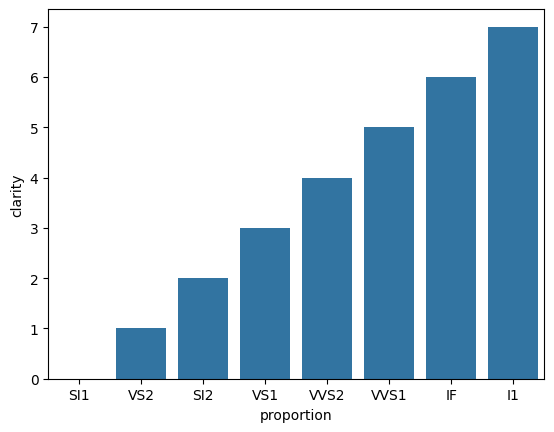

In [16]:
sns.barplot(data=clarity_counts, y='clarity', x='proportion', color='tab:blue');

## Counting Missing Data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Read the data from a CSV file
# Original source of data: https://www.kaggle.com/manjeetsingh/retaildataset available under C0 1.0 Universal (CC0 1.0) Public Domain Dedication License
sales_data = pd.read_csv('Data/Features-data-set.csv')
sales_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [25]:
sales_data.shape

(8190, 12)

In [26]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [27]:
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


C:\Users\SS\AppData\Local\Temp\ipykernel_13340\768746450.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = na_counts[i]


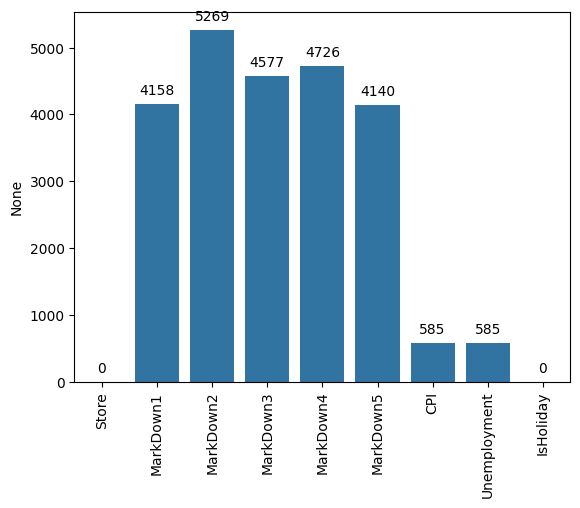

In [29]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x=na_counts.index.values, y=na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

## Pie Charts

A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken. Use a Pie chart only when the number of categories is less, and you'd like to see the proportion of each category on a chart.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read.

Guidelines to Use a Pie Chart

If you want to use a pie chart, try to follow certain guidelines:

- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).

- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.

- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

###  Plot a simple Pie chart

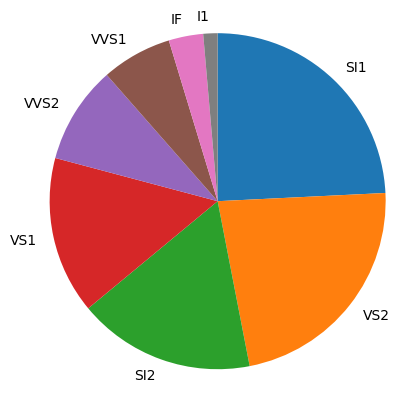

In [31]:
# Use the same diamonds dataset
sorted_counts = df['clarity'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

#### Plot a simple Donut plot

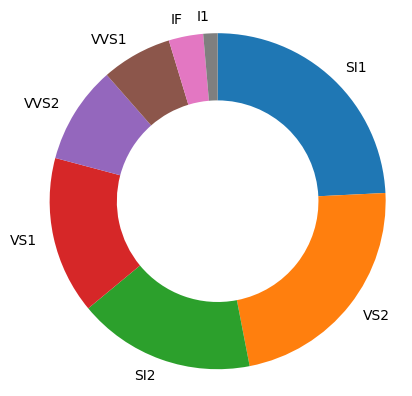

In [32]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

## Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot histograms. There is a mild variation in the calling syntax and what each library offers. For example, seaborn supports overlaying Gaussian Density Estimates.

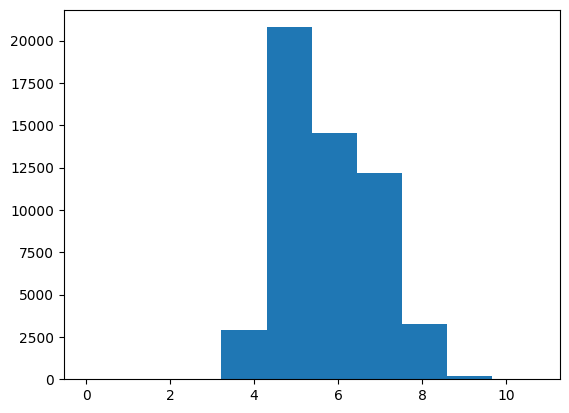

In [48]:
plt.hist(data=df, x='x');

You can see a non-uniform distribution of data points in different bins.

The distribution of speed values appears unimodal. The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasizes the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

Wouldn't it be better if I said "between 4 and 4.5" instead of "between about 4 and 4.5", and "from 4.5 to 5" instead of "from about 4.5 to 5" above?

You can use descriptive statistics (e.g. via dataframe['column'].describe()(opens in a new tab)) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set by proving the total number of bins, or explicitly defining the binning using numpy's arange(opens in a new tab) function.

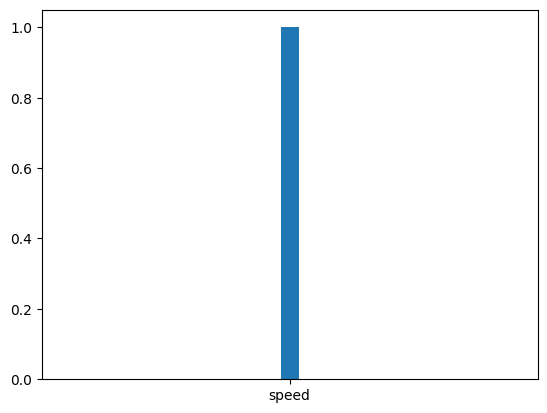

In [49]:
plt.hist(data=df, x='speed', bins=25);

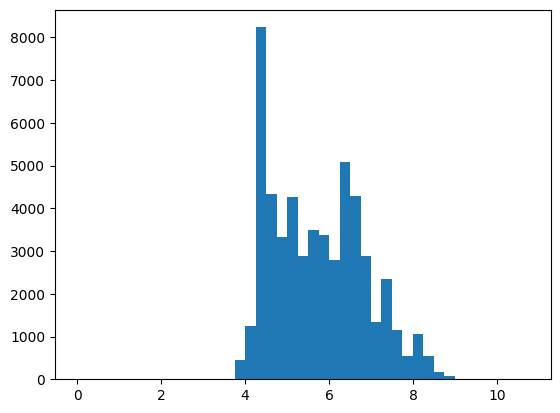

In [50]:
bins = np.arange(0, df['x'].max()+0.25, 0.25)
plt.hist(data=df, x='x', bins=bins);

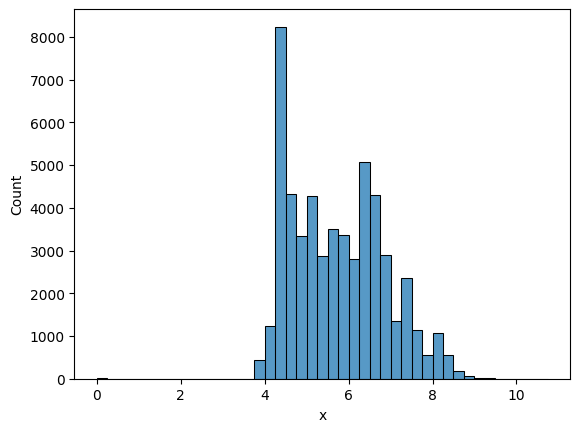

In [51]:
sns.histplot(data=df, x='x', bins=bins);

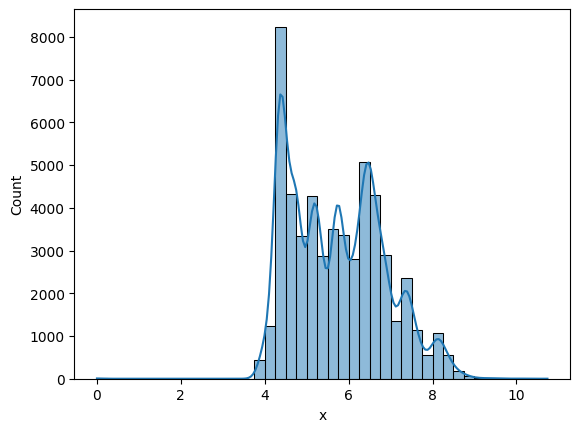

In [52]:
sns.histplot(data=df, x='x', bins=bins, kde= True);